# 一、python 实践

## 1.1 求极限

### a. 使用 python 编程求 $\lim_{x \to \infty} \frac{\sin x}{x}$

In [1]:
import sympy
from sympy import oo
# 导入 sympy 符号 x
from sympy.abc import x

# 函数定义
f = sympy.sin(x) / x
# 求极限
# 参数1: 函数
# 参数2: 求极限的变量符号
# 参数3: 极限趋紧位置的值
result = sympy.limit(f, x, oo)
result

0

### b. 使用 python 编程求 $\lim_{x \to 1} \frac{x^2-1}{x-1}$

In [2]:
import sympy
from sympy.abc import x

# 函数定义
f = (x ** 2 - 1) / (x - 1)
# 求极限
result = sympy.limit(f, x, 1)
result

2

## 1.2 求导数
### 求导 $y = \arcsin \sqrt{\sin (x)}$

In [3]:
import sympy
from sympy.abc import x

# 定义表达式
y = sympy.asin(sympy.sqrt(sympy.sin(x)))
# 求导
# 参数1: 求导的表达式
# 参数2: 对谁求导
result = sympy.diff(y, x)
result

cos(x)/(2*sqrt(1 - sin(x))*sqrt(sin(x)))

## 1.3 求偏导
### 求函数$f(x, y) = x^2 + 3xy + y^2$ 在 (1, 2) 处的偏导数

In [4]:
import sympy
from sympy.abc import x, y

# 定义表达式
f = x ** 2 + 3 * x * y + y ** 2
# 求 f 对 x 的偏导
dx = sympy.diff(f, x)
# 求 f 对 y 的偏导
dy = sympy.diff(f, y)

# 对偏导表达式赋值
point = {x: 1, y: 2}
dxv = dx.evalf(subs=point)
dyv = dy.evalf(subs=point)

f"对 x 偏导为 {dx} = {dxv}, 对 y 偏导为 {dy} = {dyv}"

'对 x 偏导为 2*x + 3*y = 8.00000000000000, 对 y 偏导为 3*x + 2*y = 7.00000000000000'

## 1.4 求方向导数
### 求 $z = x e^{2y}$ 在点 P(0, 1) 处沿 P(0, 1) 到点 Q(2, -1) 方向的方向导数

In [5]:
import sympy
from sympy.abc import x, y

# 定义表达式
z = x * sympy.exp(2 * y)
# 对 x 偏导
zdx = sympy.diff(z, x)
# 对 y 偏导
zdy = sympy.diff(z, y)

point_p = {x: 1, y: 0}
# 方向角度
angle = -sympy.pi / 4
# 计算方向导数
result = zdx.evalf(subs=point_p) * sympy.cos(angle) + zdy.evalf(subs=point_p) * sympy.sin(angle)
result

-0.5*sqrt(2)

## 1.5 求梯度
### 求 $u=xyz + z^2+ 5$ 的梯度 grad_u 以及在点 M(0, 1, -1) 处的方向导数的最大值

In [6]:
import sympy
from sympy.abc import x, y, z

# 定义表达式
u = x * y * z + z ** 2 + 5
# 求三个偏导
udx = sympy.diff(u, x)
udy = sympy.diff(u, y)
udz = sympy.diff(u, z)
point_m = {x: 0, y: 1, z: -1}
# 梯度
grad_u = [udx.evalf(subs=point_m), udy.evalf(subs=point_m), udz.evalf(subs=point_m)]
# 最大方向导数就是沿梯度方向
max_grad_u = sympy.sqrt(grad_u[0] ** 2 + grad_u[1] ** 2 + grad_u[2] ** 2)

f"梯度: {grad_u}, 最大的方向导数: {max_grad_u}"

'梯度: [-1.00000000000000, 0, -2.00000000000000], 最大的方向导数: 2.23606797749979'

## 1.6 梯度下降法
### 使用 python 求一下函数 $minf(x) = x - y + 2x^2 + 2xy + y^2$ 的最小值, 初值 (0, 0)

In [7]:
import sympy
from sympy.abc import x, y

# 定义表达式
f = x - y + 2 * x ** 2 + 2 * x * y + y ** 2
# x 偏导
dx = sympy.diff(f, x)
# y 偏导
dy = sympy.diff(f, y)

# 梯度下降
lr = 0.01  # 学习率
v_x, v_y = 0, 0  # 初始值
new_x, new_y = 0, 0
finished = False

while not finished:
    point = {x: v_x, y: v_y}
    new_x -= lr * dx.evalf(subs=point)
    new_y -= lr * dy.evalf(subs=point)
    if f.evalf(subs=point) - f.evalf(subs={x: new_x, y: new_y}) < 7e-9:
        finished = True

    v_x, v_y = new_x, new_y

f"最小值在({v_x}, {v_y})点取得，值为{f.evalf(subs={x: v_x, y: v_y})}"

'最小值在(-0.999429965989565, 1.49907766559637)点取得，值为-1.24999955094566'

## 本章练习
### a. 求一下问题的极限
* $\lim_{x \to 1} \sin{(\ln{x})}$
* $\lim_{x \to 8} \frac{\sqrt[3]{x} - 2}{x-8}$

In [8]:
import sympy
from sympy.abc import x

# 定义两个表达式
f1 = sympy.sin(sympy.log(x))
f2 = (x ** 3) - 2 / (x - 8)
# 分别求极限
f1.limit(x, 2), f2.limit(x, 8)

(sin(log(2)), -oo)

### b. 求导

In [9]:
import sympy
from sympy.abc import x

# 定义函数表达式
y = x ** 4 - 2 * x ** 3 + 5 * sympy.sin(x) + sympy.log(3)
# 对 x 求导
y.diff(x)

4*x**3 - 6*x**2 + 5*cos(x)

### c. 求函数$z = x^2 + y^2$在点 (1,2) 处沿点 (1,2)到点 $(2, 2 + \sqrt{3})$方向的方向导数，以及在点（1,2）处的梯度

In [10]:
import sympy
from sympy.abc import x, y

z = x ** 2 + y ** 2

# 角度
angle = sympy.pi / 3
point = {x: 1, y: 2}
# 偏导
dx = z.diff(x)
dy = z.diff(y)
# 方向导数
result = dx.evalf(subs=point) * sympy.cos(angle) + dy.evalf(subs=point) * sympy.sin(angle)

grad = [dx.evalf(subs=point), dy.evalf(subs=point)]

f'方向导数{result}, 梯度为{grad}'

'方向导数1.0 + 2.0*sqrt(3), 梯度为[2.00000000000000, 4.00000000000000]'

# 二、微积分
## 2.1 单积分

### a. 用函数实现 $\int_{0}^{3} \cos^2{(e^x)}dx$

In [11]:
import numpy as np

# 积分上下限
a, b = 0, 3


def f(x):
    return np.cos(np.exp(x)) ** 2


# 积分定义法求
def trap(n):
    h = (b - a) / n
    x = a
    sum = 0
    for i in range(1, n):
        x2 = a + i * h
        sum = sum + (f(x) + f(x2)) * h / 2
        x = x2
    return sum


trap(10000)

1.296434741500134

### b. 用scipy求 $\int_{0}^{3} \cos^2{(e^x)}dx$

In [12]:
from scipy.integrate import quad

#被积函数
func = lambda x: np.cos(np.exp(x)) ** 2
# 调用函数求积分
solution = quad(func, 0, 3)

solution

(1.296467785724373, 1.397797106902389e-09)

## 2.2 二重积分
### 使用 scipy 计算 $\iint\limits_{D: \{(x, y)| 0 \le x \le 10, 0 \le y \le 10\}} e^{-x^2-y^2}$

In [13]:
import numpy as np
from scipy.integrate import dblquad


def f(x, y):
    return np.exp(- x ** 2 - y ** 2)


solution, aberr = dblquad(f, 0, 10, 0, 10)

solution, aberr

(0.7853981633974476, 1.3753098510206357e-08)

## 本章练习
### 使用 scipy 求下面定积分
* $\int_{1}^{2}(x^2 + \frac{1}{x^4}) dx$
* $\int_{-1}^{0}\frac{3x^4 + 3x^2 + 1}{x^2 + 1}$

In [14]:
from scipy.integrate import quad

f1 = lambda x: x ** 2 + x ** -4
f2 = lambda x: (3 * x ** 4 + 3 * x ** 2 + 1) / (x ** 2 + 1)

quad(f1, 1, 2), quad(f2, -1, 0)

((2.625, 2.914335439641036e-14), (1.7853981633974483, 1.9821901491273144e-14))

# 三、泰勒公式和拉格朗日乘子法
## 3.1 利用泰勒多项式展开求近似
### 根据 $e^x$ 的 n 次泰勒多项式展开，求解无理数 e 的近似值
$e^{x} = 1 + x + \frac{x^2}{2!} + \cdots + \frac{x^n}{n!} + o(x^n)$

In [15]:
from math import factorial


def f(n):
    if n == 0:
        return 1
    else:
        ret = 1
        for i in range(1, n + 1):
            # 直接用函数求阶乘
            ret += 1.0 / factorial(i)
        return ret


f(0), f(10), f(100)

(1, 2.7182818011463845, 2.7182818284590455)

## 3.2 求解拉格朗日乘子法
### 求函数 $u = x^3y^2z$ 在 $x + y + z = 12$ 条件下的最大值

In [16]:
from sympy import diff, solve
from sympy.abc import x, y, z, l

# 定义拉格朗日等式
F = x ** 3 * y ** 2 * z + l * (x + y + z - 12)

# 求偏导
dx = diff(F, x)
dy = diff(F, y)
dz = diff(F, z)
dl = diff(F, l)

# 求解
# 参数1: 求解的表达式列表，解要让这些表达式都为 0
# 参数2: 参与求解的变量
result = solve([dx, dy, dz, dl], [x, y, z, l])

# 过滤掉 l = 0 的值
result = [f'x={i[0]}, y={i[1]}, z={i[2]}, F={F.evalf(subs={x: i[0], y: i[1], z: i[2]})}' for i in result if i[-1] != 0]

result

['x=6, y=4, z=2, F=6912.00000000000']

## 本章练习
### 求目标函数 V = xyz 在 xy + yz + xz = 6 的条件下的最大值

In [17]:
from sympy import diff, solve
from sympy.abc import x, y, z, l

# 定义拉格朗日等式
V = x * y * z + l * (x * y + y * z + z * x - 6)

# 求偏导
dx = diff(V, x)
dy = diff(V, y)
dz = diff(V, z)
dl = diff(V, l)

# 求解
# 参数1: 求解的表达式列表，解要让这些表达式都为 0
# 参数2: 参与求解的变量
result = solve([dx, dy, dz, dl], [x, y, z, l])

# 过滤掉 l = 0 的值
result = [(i[0], i[1], i[2], V.evalf(subs={x: i[0], y: i[1], z: i[2]})) for i in result if i[-1] != 0]
# 过滤掉 V < 0 的值
result = [f'x={x}, y={y}, z={z}, V={V}' for (x, y, z, V) in result if V >= 0]
result

['x=sqrt(2), y=sqrt(2), z=sqrt(2), V=2.82842712474619']

# 四、线性代数基础
## 4.1 求解线性方程组
### 求解线性方程组，使用 $X = A^{-1}B$; numpy.linalg.solve(); sympy.solve() 三种方式求解
$$
\left\{
    \begin{align}
    x + y + z = 2 \\
    x + 2y + 4z = 3 \\
    x + 3y + 9z = 5 \\
    \end{align}
\right.
$$

In [18]:
import numpy as np
import sympy as sp
from sympy.abc import x, y, z

A = np.array([
    [1, 1, 1],
    [1, 2, 4],
    [1, 3, 9]
])

B = np.array([2, 3, 5])

# 求逆
X1 = np.linalg.inv(A) @ B
# numpy
X2 = np.linalg.solve(A, B)

X_array = [
    x + y + z - 2,
    x + 2 * y + 4 * z - 3,
    x + 3 * y + 9 * z - 5
]
# sympy 方式
X3 = sp.solve(X_array, [x, y, z])
X1, X2, X3

(array([ 2. , -0.5,  0.5]), array([ 2. , -0.5,  0.5]), {x: 2, y: -1/2, z: 1/2})

# 五、特征值与矩阵分解
## 5.1 使用 SVD 对图像进行压缩

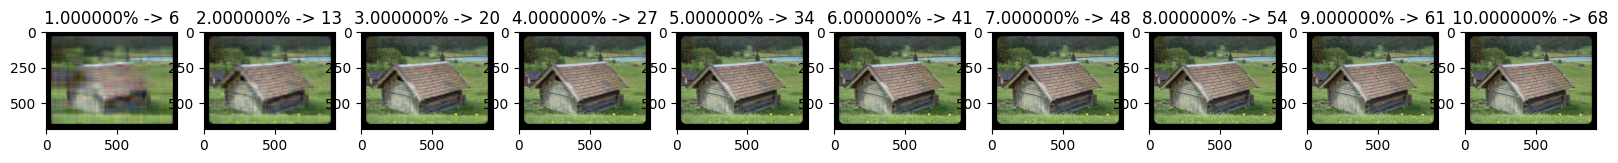

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# 读取图片，处理 RGB 分量
img = Image.open('A.png', 'r')
img = np.array(img)
img_R = img[:, :, 0]
img_G = img[:, :, 1]
img_B = img[:, :, 2]


def svd(data: np.ndarray, r: int) -> np.ndarray:
    """
    对输入数据进行 svd 分解，并保留前 r 维的数据 
    :param data: 原始数据
    :param r: 保留的前 r 维的值
    :return: 
    """
    u, gama, v = np.linalg.svd(data)
    # 奇异值生成对角阵
    gama = np.diag(gama)

    # 对 m * n 的数据 data
    # u 保存 m * r
    u = u[:, :r]
    # 奇异值矩阵 保存 r * r
    gama = gama[:r, :r]
    # v 保存 r * n
    v = v[:r, :]

    # 计算压缩后的数据
    ret = (u @ gama) @ v
    # 处理不满足要求的色块
    ret[ret < 0] = 0
    ret[ret > 255] = 255
    # 保存为 uint8 类型, 因为 rgb 色值不为 float
    return ret.astype('uint8')


def show(per: float, ax: plt.Subplot):
    """
    在 ax 的位置展示 1 - per% 损失度的图片
    :param per: 
    :param ax: 
    :return: 
    """
    # 计算 per% 所占的图片长度
    width = int(min(img_G.shape[0], img_G.shape[1]) * per)
    # 标题
    ax.set_title("%f%% -> %d" % (per * 100, width))

    # rgb 分别 svd 分解
    svd_r = svd(img_R, width)
    svd_g = svd(img_G, width)
    svd_b = svd(img_B, width)
    # 重建图片
    image = np.stack((svd_r, svd_g, svd_b), 2)
    image = Image.fromarray(image)
    # Image.fromarray(image).save("{}.jpg".format(width))
    # 在指定位置展示
    ax.imshow(image)


# 生成一个 1 * 10 的绘图列表
fig, axes = plt.subplots(1, 10, figsize=(20, 8))  # type: plt.Figure, plt.Subplot

# 绘图
for i in range(0, 10):
    # 绘制保留 (i + 1)% 的奇异值分解的图像, 在第 i 个位置
    show((i + 1) / 100, axes[i])


# 六、概率论基础

## 6.1 创建连续概率密度、分布函数和变量

### 输出正态分布函数和分布图 $f(x) = \frac{1}{\sqrt{2\pi} \sigma} exp(-\frac{(x-\mu)^2}{2\sigma^2})$

(1.0240895420129728, 1.9918888069445917)

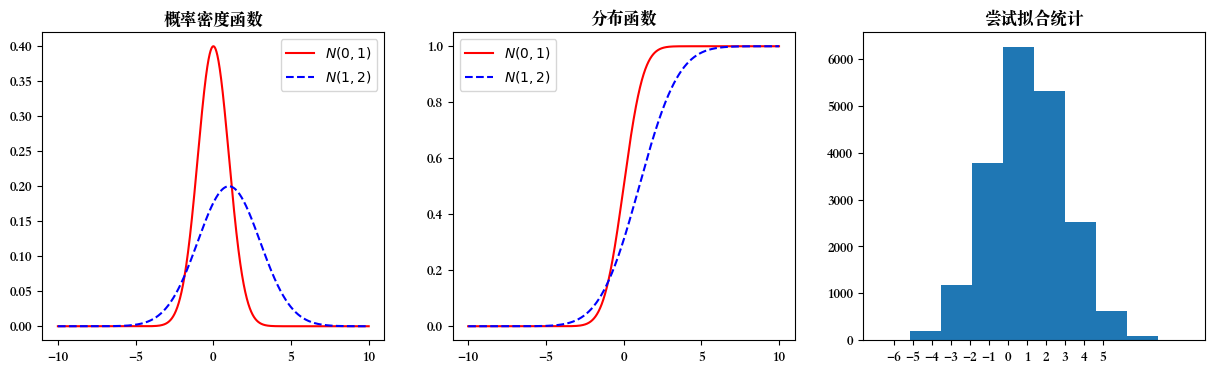

In [20]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 默认 loc=0, scale=1 标准正台
X = ss.norm()  # type: ss.rv_continuous
Y = ss.norm(loc=1.0, scale=2.0)  # type: ss.rv_continuous

t = np.arange(-10, 10, 0.01)

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # type: plt.Figure, list[plt.Axes]

# pdf Probability density function 概率密度函数
axes[0].plot(t, X.pdf(t), label="$N(0, 1)$", color='r')
axes[0].plot(t, Y.pdf(t), 'b--', label='$N(1, 2)$')
axes[0].set_title("概率密度函数")
axes[0].legend()

# cdf Cumulative distribution function 分布函数
axes[1].plot(t, X.cdf(t), label="$N(0, 1)$", color='r')
axes[1].plot(t, Y.cdf(t), 'b--', label='$N(1, 2)$')
axes[1].set_title("分布函数")
axes[1].legend()

# 生成满足分布的随机变量 Random variates
Y1 = Y.rvs(size=20000)
axes[2].hist(Y1)
axes[2].set_title("尝试拟合统计")
plt.xticks(np.arange(-6, 6, 1))

ss.norm.fit(Y1)

## 6.2 创建离散概率函数和分布图，变量

### 画出如下概率函数及其分布函数图

|---|---|---|---|---|---|
|x|0|1|2|3|4|
|对应概率|1/16|1/4|3/8|1/4|1/16|

Text(0.5, 1.0, '分布函数')

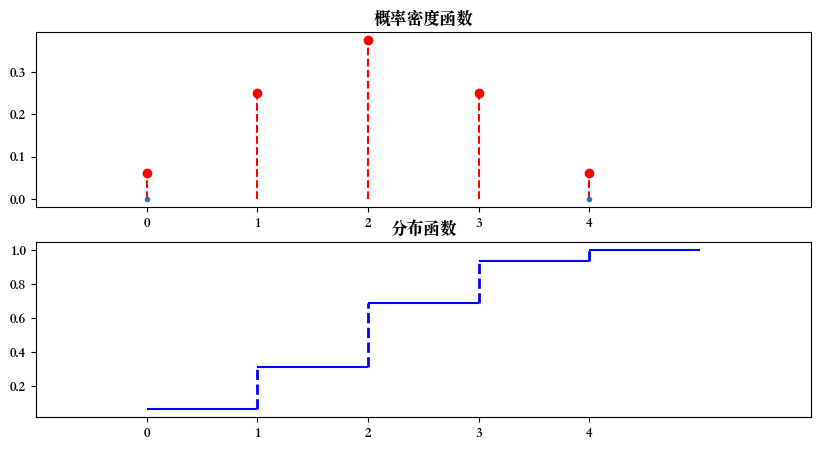

In [21]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 概率密度
xk = range(5)
pk = [1 / 16, 1 / 4, 3 / 8, 1 / 4, 1 / 16]

# 离散分布
custome = ss.rv_discrete(values=(xk, pk))

# 生成离散分布的值， 采样20次
custome1 = custome.rvs(size=20)
custome1.reshape(-1, 10)

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

_, (ax0, ax1) = plt.subplots(2, figsize=(10, 5))  # type: plt.Figure, (plt.Axes, plt.Axes)

ax0.set_title("概率密度函数")
# 针状图
ax0.stem(xk, pk, markerfmt='ro', linefmt='r--', basefmt=".")
ax0.set_xlim(-1, 6)
ax0.set_xticks(np.arange(0, 5, 1))

# 分布函数
pk1 = custome.cdf(xk)
x_max = range(1, 6)
xk1 = range(1, 5)
# 为了生成横线
y_min = pk1[0:4]
y_max = pk1[1:5]

ax1.hlines(pk1, xk, x_max, linestyles='-', colors='b')
ax1.set_xlim(-1, 6)
ax1.set_xticks(np.arange(0, 5, 1))

ax1.vlines(xk1, y_min, y_max, colors='b', linestyles='--', lw=2)
ax1.set_title("分布函数")

## 习题
### a. 已知某路口发生事故的平均概率是每天2次，并且服从泊松分布，用python给出每天发生0、1、2、3、4次事故的概率分别是多少？
$P(X = x) = \frac{\lambda^{x} e^{-\lambda}}{x!}$

<StemContainer object of 3 artists>

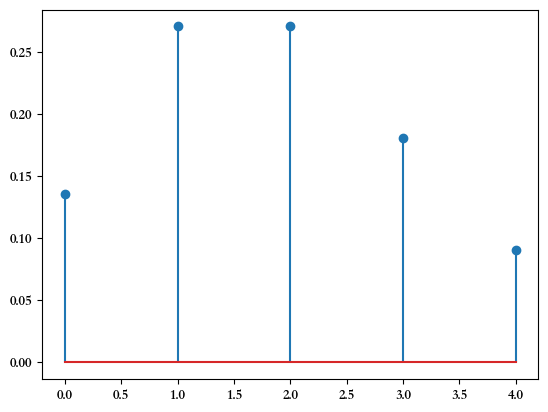

In [22]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 柏松分布, lambda = 2
mu = 2
poisson = ss.poisson(mu)

# 发生次数 0, 1, 2, 3, 4
X = np.arange(0, 5, step=1)  # type: np.ndarray
plt.stem(poisson.pmf(X))

### b. 计算50个人中出现同一天生日的概率

In [23]:
from math import factorial

# 统计 10000 次
counter, times = 0, int(1e4)

for i in range(times):
    # 随机生成生日统计，随机 50 次，如果出现一天生日相同，则最后长度一定小于50
    if len({np.random.randint(1, 365) for _ in range(50)}) != 50:
        counter += 1
# 概率
counter / times

0.9696

### c. 一个盒子里装了3个硬币，每个硬币抛出正面的概率分别为0.3,0.5,0.7。假设随机取出一个硬币，抛了49个正面，31个反面，用python编程实现抛出哪个硬币的概率大。

In [24]:
from math import factorial

input_prob = [0.3, 0.5, 0.7]

H = 49
T = 31

p = 0


def max_prob():
    # 最可能的概率
    max_prob_value = -1
    # 最可能的硬币编号
    max_person = 1
    for (i, v) in enumerate(input_prob):
        # 概率v出现正面的次数的概率
        current_prob = prob(v)
        if current_prob > max_prob_value:
            max_prob_value = current_prob
            max_person = i + 1
    return max_person, max_prob_value


def prob(v):
    """
    概率v出现正面的次数的概率
    """
    # 将H个正面和T个反面排列的不同方式数量的比例
    f1 = factorial(H + T) / (factorial(H) * factorial(T))
    # 出现H个正面和T个反面的概率
    f2 = (v ** H) * ((1.0 - v) ** T)
    return f1 * f2


max_prob()

(3, 0.022707218690321822)

# 七、概率估计

## 7.1 验证中心极限定理

### a. 假设有n个随机变量X1，X2，...，Xn相互独立并且服从U（a,b）的均匀分布，均匀分布的期望是（a+b）/2，方差是（b-a）2/12根据中心极限定理，这些随机变量的均值的分布满足正态分布。

Text(0.5, 0.98, '服从均匀分布U[0, 1]的多个随机变量的均值逼近正态分布')

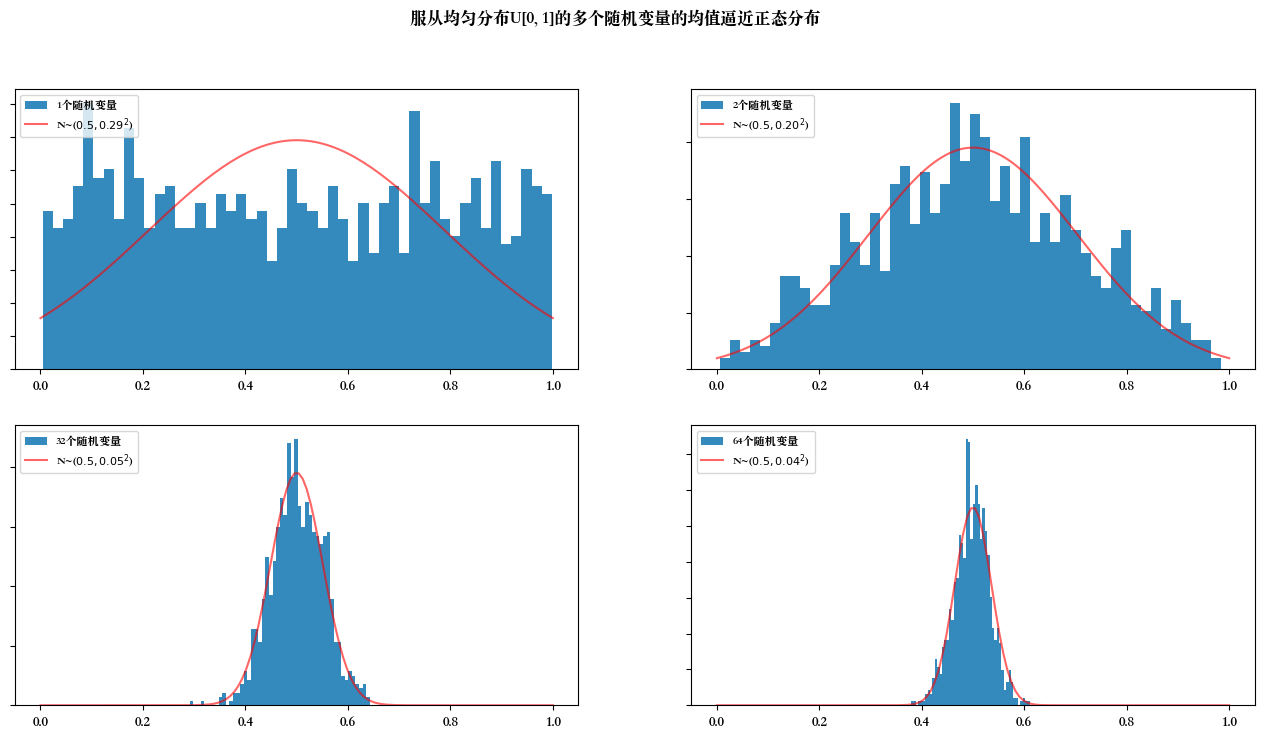

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

f = plt.figure(figsize=(16, 8))  # type: plt.Figure

# [0, 1] 均匀分布
a, b = 0, 1
mean, var = (a + b) / 2, (b - a) ** 2 / 12

# 采样个数
sample_nums = 1000


def p_norm(nvr):
    """
    nvr 个相互独立变量的正态图像
    :param nvr: 
    :return: 
    """
    mu = mean
    sigma = np.sqrt(var / nvr)
    # 正态分布
    norm_dis = stats.norm(mu, sigma)

    norm_x = np.linspace(a, b, 128)
    pdf = norm_dis.pdf(norm_x)

    plt.plot(norm_x, pdf, 'r', alpha=0.6, label=f'N~(${mu:.1f}, {sigma:.2f}^2$)')
    plt.legend(loc='upper left', prop={'size': 8})


def sample(rv_num):
    # 对随机变量 X1 --- Xn 进行抽样
    # 0-1 均匀分布
    single_sample_dist = stats.uniform(loc=a, scale=b)

    x = 0
    for j in range(rv_num):
        x += single_sample_dist.rvs()

    x *= 1 / rv_num
    return x


def plot_hist(rv_num, n):
    """
    
    :param rv_num: 随机变量个数
    :param n: 
    :return: 
    """
    sp = f.add_subplot(2, 2, n)
    x = np.array([sample(rv_num) for _ in range(sample_nums)])
    # 画出直方图
    plt.hist(x, 50, density=True, color='#348ABD', label=f'{rv_num}个随机变量')
    plt.setp(sp.get_yticklabels(), visible=False)

    # 正态分布曲线
    p_norm(rv_num)


nvr = ([1, 2, 32, 64])
for i in range(np.size(nvr)):
    plot_hist(nvr[i], i + 1)

plt.suptitle("服从均匀分布U[0, 1]的多个随机变量的均值逼近正态分布")


### b. 假设有n个随机变量X1，Xa，⋯，X，相互独立并且服从入=2，的泊松分布，利用中心极限定理，验证这些随机变量的均值的分布满足正态分布。并给出正态分布的均值和方差。

Text(0.5, 0.98, '服从$\\lambda = 2$ 泊送分布的多个相互独立变量的均值逼近正态分布')

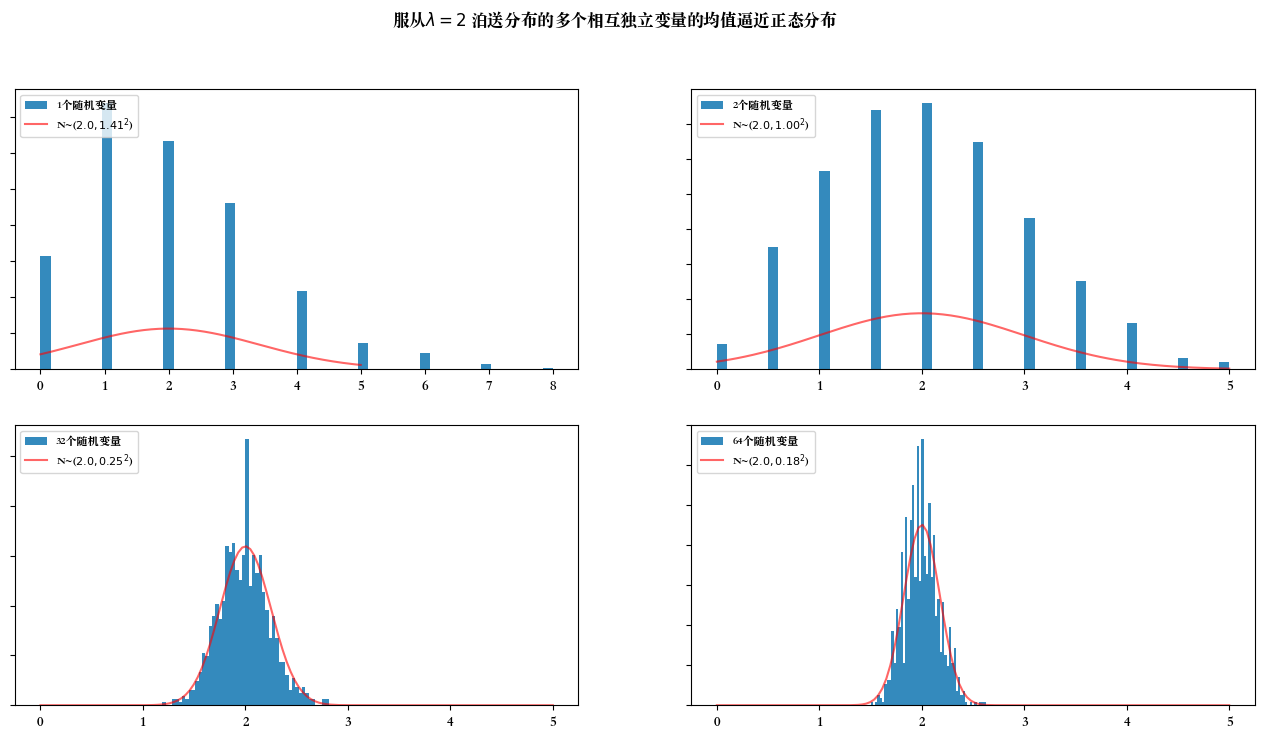

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

f = plt.figure(figsize=(16, 8))  # type: plt.Figure

norm_mu, norm_var = 2, 2

# 采样个数
sample_nums = 1000


def p_norm(nvr):
    mu = norm_mu
    sigma = np.sqrt(norm_var / nvr)
    norm_x = np.linspace(0, 5, 128)
    # 正态分布
    norm_dis = stats.norm(mu, sigma)
    pdf = norm_dis.pdf(norm_x)
    plt.plot(norm_x, pdf, 'r', alpha=0.6, label=f'N~(${mu:.1f}, {sigma:.2f}^2$)')

    plt.legend(loc='upper left', prop={'size': 8})


def sample(rv_num):
    # 对随机变量 X1 --- Xn 进行抽样
    # 柏松分布
    mean = 2

    x = 0
    for j in range(rv_num):
        x += stats.poisson.rvs(mean)

    x *= 1 / rv_num
    return x


def plot_hist(rv_num, n):
    """
    
    :param rv_num: 随机变量个数
    :param n: 
    :return: 
    """
    x = np.zeros((sample_nums,))
    sp = f.add_subplot(2, 2, n)
    x = np.array([sample(rv_num) for _ in range(sample_nums)])
    # 画出直方图
    plt.hist(x, 50, density=True, color='#348ABD', label=f'{rv_num}个随机变量')
    plt.setp(sp.get_yticklabels(), visible=False)

    # 正态分布曲线
    p_norm(rv_num)


nvr = ([1, 2, 32, 64])
for i in range(np.size(nvr)):
    plot_hist(nvr[i], i + 1)

plt.suptitle("服从$\lambda = 2$ 泊送分布的多个相互独立变量的均值逼近正态分布")


## 7.2 最大似然估计求解模型参数

### 根据数据集中搜集到的样本数，利用最大似然法估计总体分布的模型参数

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

filename = './data/QQ_data.csv'
messages = pd.read_csv(filename)
y_obs = messages['numbers'].values

np.seterr(invalid='ignore')


def poisson_log_prob(mu, sign=-1):
    # 根据泊松模型和参数值返回观测数据的总似然值
    return np.sum(sign * stats.poisson.logpmf(y_obs, mu=mu))


fig = plt.figure(figsize=(12, 5))  # type: plt.Figure
plt.title('Frequency of QQMessages')
plt.xlabel('Number of QQMessages')
plt.ylabel('Frequency')
plt.hist(y_obs, range=(0, 60), bins=30, histtype='stepfilled')

freq_results = opt.minimize_scalar(poisson_log_prob)
# 泊松分布的 mu
mu = freq_results['x']
print(f'mu = {mu}')

# 画泊松分布图像
x = range(0, 60)
plt.plot(x, stats.poisson(mu).pmf(x) * len(y_obs))

## 7.3 朴素贝叶斯进行用户满意度测试 

### 根据汽车的属性（买入价、维护费、车门数、可容纳人数、后备箱大小、安全性），测评用户满意度（不可接受，可接受，好，非常好）

In [ ]:
import pandas
from sklearn.naive_bayes import BernoulliNB

data = pandas.read_table("./data/car.txt",
                         names=['买入价', '维护费', '车门数', '可容纳人数', '后备箱大小', '安全性', '满意度'], sep=',')

# 数据清理
price_map = {
    'vhigh': 4,
    'high': 3,
    'med': 2,
    'low': 1
}
door_map = {
    '2': 2,
    '3': 3,
    '4': 4,
    '5more': 5
}
capacity = {
    'small': 1,
    'med': 2,
    'big': 3
}
safe = {
    'low': 1,
    'med': 2,
    'high': 3
}
person = {
    '2': 1,
    '4': 2,
    'more': 3
}
acc = {
    'unacc': 1,
    'acc': 2,
    'good': 3,
    'vgood': 4
}
data['买入价'] = data['买入价'].apply(lambda x: price_map[x])
data['维护费'] = data['维护费'].apply(lambda x: price_map[x])
data['可容纳人数'] = data['可容纳人数'].apply(lambda x: person[x])
data['车门数'] = data['车门数'].apply(lambda x: 5 if x == '5more' else int(x))
data['后备箱大小'] = data['后备箱大小'].apply(lambda x: capacity[x])
data['安全性'] = data['安全性'].apply(lambda x: safe[x])

train_data, test_data = data.iloc[:1600, :], data.iloc[1600:, :]
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# 朴素贝利叶
clf = BernoulliNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
# 正确率
np.mean(predicted == y_test)

# 八、数据的空间变换

## 8.1 常用核函数的实现

### 在python中实现以下常用的三种核函数，并计算X = [1,2,3,4], Y = [5,6,7,8]分别使用不同核函数计算的结果。

In [31]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])


def linear(X: np.ndarray, Y: np.ndarray):
    """
    线性核函数
    :param X: 
    :param Y: 
    :return: 
    """
    return X @ Y.T


def gaussian(X: np.ndarray, Y: np.ndarray, sigma: float):
    """
    高斯核函数
    :param X: 
    :param Y: 
    :param sigma: 
    :return: 
    """
    return np.exp(-np.linalg.norm(X - Y) ** 2 / (2 * sigma ** 2))


def poly(X: np.ndarray, Y: np.ndarray, gamma: float, c: float, degree: float):
    """
    多项式核函数
    :param X: 
    :param Y: 
    :param gamma: 倍数
    :param c: 偏差
    :param degree: 维度 
    :return: 
    """
    ret = X @ Y.T
    return (ret * gamma + c) ** degree


f'线性核函数: {linear(x, y)}    高斯核函数: {gaussian(x, y, 4)}    多项式核函数: {poly(x, x, 1, 0, 1)}'

'线性核函数: 70    高斯核函数: 0.1353352832366127    多项式核函数: 30'

## 8.2 线性可分 SVM 实现

### 训练数据集：正样点：（4,3）（3,3）负样点：（1,1）利用SVC对测试集（4,5）（0,0），（1,3）进行预测

In [37]:
from sklearn.svm import SVC, NuSVC, LinearSVC

X = np.array([[4, 3], [3, 3], [1, 1]])
y = np.array([1, 1, -1])

# C: 惩罚系数
# kernel: 核函数, 默认高斯
model = SVC(kernel='linear')
model.fit(X, y)

model.predict(np.array([[4, 5], [0, 0], [1, 3]]))

w = model.coef_[0]
a = -w[0] / w[1]
print("支持向量：\n", model.support_vectors_)  #输出支持向量
print("支持向量的标号：", model.support_)  #输出支持向量的标号
print("每类支持向量的个数：", model.n_support_)  # 每类支持向量的个数
print("数据集X到分类超平面的距离：", model.decision_function(X))
print("参数(法向量) w=", w)
print("分类线的斜率 a=", a)
print("分类平面截距 b：", model.intercept_)  #超平面的截距值(常数值)
print("系数", model.coef_)  # 每个特征系数(重要性)，只有 Linearsvc 核两数可用

支持向量：
 [[1. 1.]
 [3. 3.]]
支持向量的标号： [2 1]
每类支持向量的个数： [1 1]
数据集X到分类超平面的距离： [ 1.5  1.  -1. ]
参数(法向量) w= [0.5 0.5]
分类线的斜率 a= -1.0
分类平面截距 b： [-2.]
系数 [[0.5 0.5]]


## 8.3 分线性 SVM 实现

### 随机生成如图所示的两类数据，构造三种核函数（线性、多项式、高斯）的算法拟合数据集，并画出拟合的分类超平面

([], [])

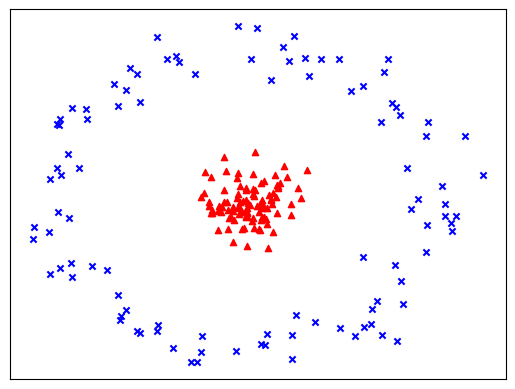

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']


# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']


def plot_decision_boundary(plt: plt.Axes, model: SVC, X: np.ndarray, y: np.ndarray, h=0.03, draw_SV=True,
                           title='精度范围'):
    # 各个维度数据的最大最小值
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 坐标矩阵
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))  # type: np.ndarray, np.ndarray

    label_predict = model.predict(np.stack((xx.flat, yy.flat), axis=1))  # type: np.ndarray
    label_predict = label_predict.reshape(xx.shape)

    # plt.set_title(title)
    # plt.xlim(xx.min(), xx.max())
    # plt.ylim(yy.min(), yy.max())
    # plt.xticks()
    # plt.yticks()

    plt.contourf(xx, yy, label_predict, alpha=0.5)

    markers = ['x', '^', 'o']
    colors = ['b', 'r', 'c']

    classes = np.unique(y)

    for label in classes:
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], c=colors[label], s=60, marker=markers[label])

    if draw_SV:
        SV = model.support_vectors_
        n = model.n_support_[0]
        plt.scatter(SV[:n, 0], SV[:n, 1], s=15, c='black', marker='o')
        plt.scatter(SV[n:, 0], SV[n:, 1], s=15, c='g', marker='o')


# 产生样本点
X, y = make_circles(200, factor=0.1, noise=0.1)  # type: np.ndarray, np.ndarray

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', s=20, marker='x')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', s=20, marker='^')
plt.xticks(())
plt.yticks(())

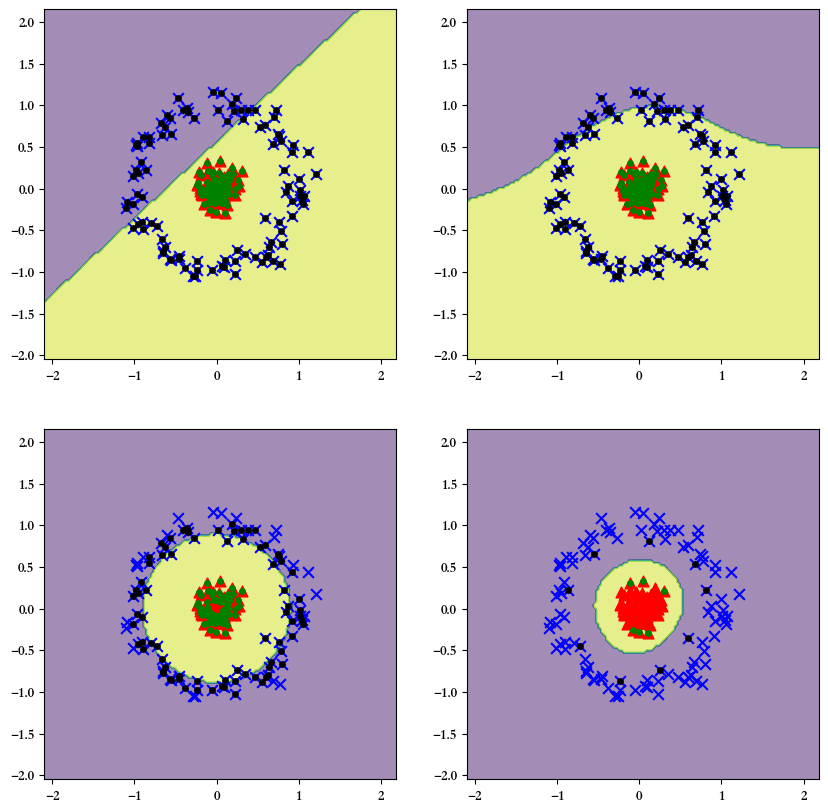

In [52]:
# 线性核函数
model_liner = SVC(C=1.0, kernel='linear')
model_liner.fit(X, y)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # type: plt.Figure, list[list[plt.Axes]]

plot_decision_boundary(axes[0][0], model_liner, X, y, title='线性核函数')

# 多项式核函数
model_poly = SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
model_poly.fit(X, y)
plot_decision_boundary(axes[0][1], model_poly, X, y, title='3维多项式核函数')

model_poly = SVC(C=1.0, kernel='poly', degree=4, gamma='auto')
model_poly.fit(X, y)
plot_decision_boundary(axes[1][0], model_poly, X, y, title='4维多项式核函数')

# 高斯核函数
model_gaussian = SVC(C=1.0)
model_gaussian.fit(X, y)
plot_decision_boundary(axes[1][1], model_gaussian, X, y, title='高斯核函数')

## 8.4 非线性 SVM 实现

### 对下图中的数据进行SVM分类

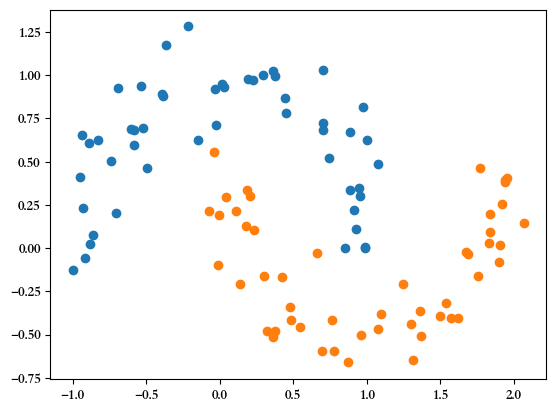

In [54]:

X = np.array([[1.58330836e-02, 9.48635918e-01],
              [8.74391770e-01, -6.60960740e-01],
              [1.90567955e+00, 1.57762215e-02],
              [1.76712793e+00, 4.61455453e-01],
              [9.85679782e-01, 6.48245492e-03],
              [1.53638288e+00, -3.18853962e-01],
              [1.77101389e-01, 1.26671939e-01],
              [1.93973267e+00, 3.95413210e-01],
              [-7.41190696e-01, 5.04204930e-01],
              [-2.16481439e-01, 1.28238704e+00],
              [3.75739596e-01, 9.94373013e-01],
              [1.07411865e+00, 4.85736353e-01],
              [1.37129502e+00, -5.06159442e-01],
              [-9.14971791e-01, -5.82601780e-02],
              [3.19359419e-01, -4.80897640e-01],
              [1.83135104e+00, 2.70266838e-02],
              [1.24373032e+00, -2.10047852e-01],
              [-6.06026488e-01, 6.88377707e-01],
              [1.07678022e+00, -4.66803184e-01],
              [-8.91805257e-01, 6.09956046e-01],
              [2.04243824e-01, 3.04228120e-01],
              [1.75240795e+00, -1.58738944e-01],
              [-3.85393350e-01, 8.77958401e-01],
              [9.15245071e-01, 2.22858467e-01],
              [9.75013363e-01, 8.18879842e-01],
              [8.83305469e-01, 3.35484610e-01],
              [4.24706584e-01, -1.65651926e-01],
              [-2.22010019e-02, 7.14482877e-01],
              [1.86957399e-01, 3.39245979e-01],
              [1.83601543e+00, 9.26196050e-02],
              [7.04168173e-01, 7.25168221e-01],
              [1.00105472e+00, 6.25661446e-01],
              [9.26444663e-01, 1.08743362e-01],
              [4.46438442e-01, 8.69697689e-01],
              [-3.34839467e-02, 9.18273278e-01],
              [7.62356087e-01, -4.14950818e-01],
              [4.75113729e-01, -3.38078903e-01],
              [1.93873891e+00, 3.80867367e-01],
              [1.95444528e-01, 9.76167450e-01],
              [-9.37029868e-01, 6.54370347e-01],
              [-9.30878958e-01, 2.34874267e-01],
              [1.31546966e+00, -6.47085899e-01],
              [9.86044212e-01, 2.88249026e-03],
              [1.09888500e+00, -3.82041309e-01],
              [6.58453680e-01, -2.97751189e-02],
              [7.39393783e-01, 5.21013642e-01],
              [2.87742960e-02, 9.30204071e-01],
              [3.59117699e-01, 1.02611245e+00],
              [-5.82095126e-01, 5.95984238e-01],
              [1.83635173e+00, 1.96811531e-01],
              [-6.88963811e-01, 9.25944856e-01],
              [-6.06343327e-03, 1.89302203e-01],
              [-3.68510049e-01, 1.17556925e+00],
              [1.62003712e+00, -4.01144854e-01],
              [1.10755739e-01, 2.12620975e-01],
              [1.91981676e+00, 2.53001737e-01],
              [1.29859493e+00, -4.38667675e-01],
              [-8.80202162e-01, 2.14779115e-02],
              [-5.36277169e-01, 9.39523059e-01],
              [1.36419812e+00, -3.63732731e-01],
              [-8.63474886e-01, 7.79548144e-02],
              [-4.94238955e-01, 4.65815260e-01],
              [4.47781579e-01, 7.79725875e-01],
              [9.50195249e-01, 3.01439801e-01],
              [2.98346599e-01, -1.59947879e-01],
              [-3.81994857e-02, 5.58073964e-01],
              [8.54476468e-01, 5.85590388e-04],
              [6.99624831e-01, 1.02853582e+00],
              [2.30378128e-01, 1.05754732e-01],
              [4.84101959e-01, -4.18095437e-01],
              [6.93636915e-01, -5.93623841e-01],
              [4.42524079e-02, 2.96975530e-01],
              [7.79090492e-01, -5.97494690e-01],
              [2.06773978e+00, 1.47174832e-01],
              [1.35301219e-01, -2.07487167e-01],
              [-7.13859277e-02, 2.16467326e-01],
              [9.58754937e-01, -5.04884890e-01],
              [1.95543286e+00, 4.07950036e-01],
              [-3.94148404e-01, 8.89385737e-01],
              [1.49500161e+00, -3.93237571e-01],
              [9.49180638e-01, 3.50838949e-01],
              [5.44173701e-01, -4.56955034e-01],
              [1.57203156e+00, -4.04863883e-01],
              [3.61990165e-01, -5.11524478e-01],
              [-5.81115442e-01, 6.84694859e-01],
              [6.99522611e-01, 6.84020151e-01],
              [8.86835467e-01, 6.73392303e-01],
              [2.28472311e-01, 9.75499364e-01],
              [1.67607100e+00, -1.96999433e-02],
              [2.95318884e-01, 1.00221531e+00],
              [-7.08366715e-01, 2.04838856e-01],
              [1.68934251e+00, -3.55042304e-02],
              [-8.24706019e-01, 6.24611711e-01],
              [-1.47439006e-01, 6.25775753e-01],
              [3.79056683e-01, -4.81558031e-01],
              [-9.97277789e-01, -1.26119674e-01],
              [1.89912347e+00, -7.87429337e-02],
              [-5.22182681e-01, 6.92293901e-01],
              [-1.02976326e-02, -9.69610587e-02],
              [-9.51553169e-01, 4.11766224e-01]])
y = np.array(
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
     1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

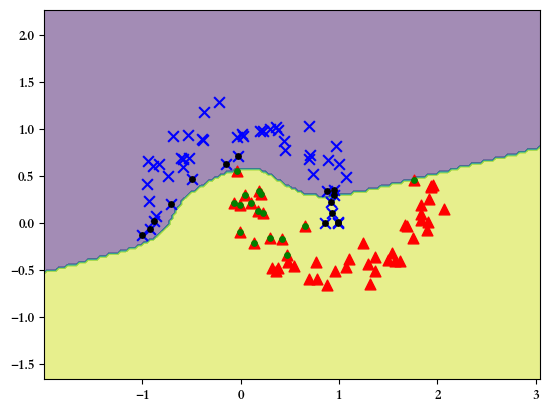

In [63]:
model_poly_2 = SVC(C=1.2, kernel='poly', degree=5, gamma=2)
model_poly_2.fit(X, y)
plot_decision_boundary(plt, model_poly_2, X, y)